# Susceptibility

$$
Z = \sum_n e^{-\beta E_n}\\
m(B) = \frac{1}{\beta Z} \frac{\partial Z}{\partial B}\\
\chi = \lim_{B \to 0} \frac{\partial m}{\partial B}
$$

## Eigenvalues and eigenstates in presence of $\vec B$

### The easy ones: $n=0,1,3,4$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\Delta_{\pm} \equiv \sqrt{v^2 + (\epsilon_d \pm \frac{1}{2}B)^2}\\
\ket{0,0} \text{ and } \ket{2,2}\begin{cases} E_{0} = E_{15} = \frac{1}{4}k \end{cases}\\
\text{ between }\ket{\uparrow,0},\ket{0,\uparrow} \text{ and between }\ket{\uparrow,2},\ket{2,\uparrow}\begin{cases}
E_{1} = E_{11} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B + \Delta_{+}\right)\\
E_{2} = E_{12} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B - \Delta_{+}\right)
\end{cases}\\
\text{ between }\ket{\downarrow,0},\ket{0,\downarrow} \text{ and between }\ket{\downarrow,2},\ket{2,\downarrow}\begin{cases}
E_{3} = E_{13} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B + \Delta_{-}\right)\\
E_{4} = E_{14} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B - \Delta_{-}\right)
\end{cases}\\
$$

### The easy ones in $n=2$

$$
\ket{\uparrow, \uparrow}: E_5 = \epsilon_d + \frac{1}{4}j + \frac{1}{2}B\\
\ket{\downarrow, \downarrow}: E_6 = \epsilon_d + \frac{1}{4}j - \frac{1}{2}B\\
\ket{\text{charge triplet 0}}: E_7 = \frac{1}{4}k\\
$$

### The remaining subspace

$$
\begin{pmatrix}
    \epsilon_d+\frac{1}{4}j & B & 0\\
    B & \epsilon_d - \frac{3}{4}j & -2v\\
    0 & -2v & -\frac{3}{4}k
\end{pmatrix}
$$
The basis is: $\ket{\text{spin trip. } 0}, \ket{\text{spin singl.}}, \ket{\text{charge singl.}}$

The next step is to diagonalize this matrix.

In [2]:
import itertools
from tqdm import tqdm
from time import sleep
from multiprocessing import Pool
import numpy as np
from math import *
import matplotlib
from matplotlib import pyplot as plt

font = {'size'   : 17}

matplotlib.rc('font', **font)
#matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 7, 5
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
from sympy import *
init_printing(use_unicode=True)
ed,j,k,v,B,E,beta,x = symbols('ed J k v B E beta x')

In [6]:
M = Matrix([[ed + j/4, B, 0], [B, ed - 3*j/4, -2*v], [0, -2*v, -3*k/4]])
charp = M.charpoly(x)
sols = solve(charp, x)

In [3]:
delta_p = sqrt(v**2 + (ed + B/2)**2)
delta_m = sqrt(v**2 + (ed - B/2)**2)
Es = [[]]*16
Es[0] = Es[15] = k/8 + k/8
Es[1] = Es[11] = (ed + B/2 + delta_p)/2
Es[2] = Es[12] = (ed + B/2 - delta_p)/2
Es[3] = Es[13] = (ed - B/2 + delta_m)/2
Es[4] = Es[14] = (ed - B/2 - delta_m)/2
Es[5] = ed + j/4 + B/2
Es[6] = ed + j/4 - B/2
Es[7] = k/4
Es[8] = sols[0]
Es[9] = sols[1]
Es[10] = sols[2]

In [ ]:
Z = 0
for E in Es:
    Z += exp(-beta*E)
m = (1/beta)*diff(Z, B)/Z
chi_B = diff(m, B)
chi_B.subs({ed:0, v: 0, k: 0})

In [ ]:
chi = limit(chi_B, B, 0)

## Alternate way

Okay, so keeping the $v$ and diagonalizing does not seem to be tractable. So we set $v=0$ and then diagonalize. The resultant susceptibility is

$$
\chi(\epsilon_d, k, j, \beta) = \frac{\left[4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{2}\right)}\right] \frac{1}{4}\beta + e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{4 + 3\exp\left\{-\beta \frac{k}{4}\right\} + \exp\left\{\beta \frac{3k}{4}\right\} + 4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{2}\right)} + 2e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)}\cosh \left(\beta \frac{j}{2}\right)}
$$
This has the behaviour 
$$
\frac{1}{\beta}\chi \to \frac{1}{8} \text{ when } T \to \infty
$$
and 
$$
\frac{1}{\beta}\chi \to \frac{1}{2j} \text{ when } T \to 0
$$
We can plot the susceptibility for the simpler case of $\epsilon_d=k=v=0$. It looks like
$$
	\chi(j, \beta) = \frac{\left[4 + 2e^{-\beta \frac{j}{2}}\right] \frac{1}{4}\beta + e^{\beta\frac{j}{4}} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{12 + 2e^{-\beta \frac{j}{2}} + 2e^{\beta\frac{j}{4}}\cosh \left(\beta \frac{j}{2}\right)}\\
$$

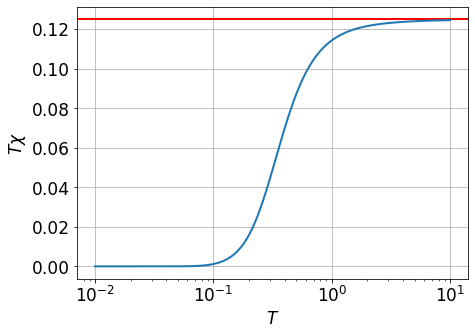

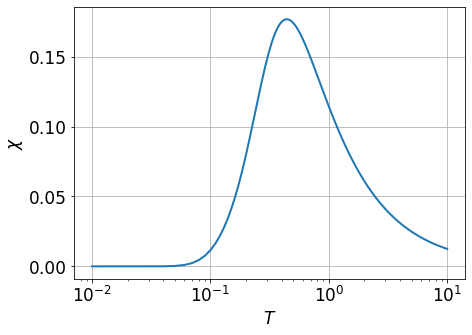

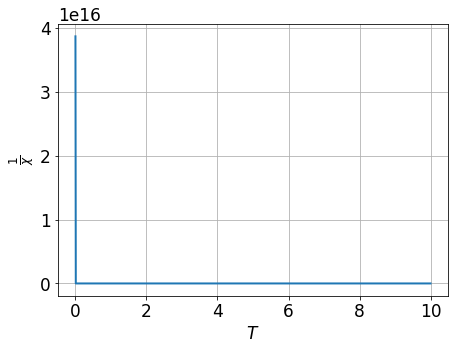

In [4]:
def get_chi(ed, j, k, T):
    beta = 1/T
    numerator = (4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2))) * beta/4 + exp(-beta * (ed - j/4)) * sinh(beta * j/2) / j
    denominator = 4 + 3 * exp(-beta * k/4) + exp(beta * 3*k/4) + 4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2)) + 2 * exp(-beta * (ed - j/4)) * cosh(beta * j/2)
    return numerator/denominator


j = 1
T_range = np.arange(10**(-2), 10**1, 10**(-2))
ed = 0
k = 3*j/2
data = itertools.product([ed],[j],[k], T_range)
chi = np.array(Pool(processes=40).starmap(get_chi,data))

plt.axhline(1/8, 0, T_range[-1], color="r")
plt.plot(T_range, T_range * chi)
plt.ylabel(r"$T \chi$")
plt.xlabel(r"$T$")
plt.xscale("log")
plt.show()
smaller_range = np.where(T_range <= 1)
plt.plot(T_range, chi)
plt.ylabel(r"$\chi$")
plt.xlabel(r"$T$")
plt.xscale("log")
plt.show()
plt.plot(T_range, 1/chi)
plt.ylabel(r"$\frac{1}{\chi}$")
plt.xlabel(r"$T$")
plt.show()

## Effect of $k$

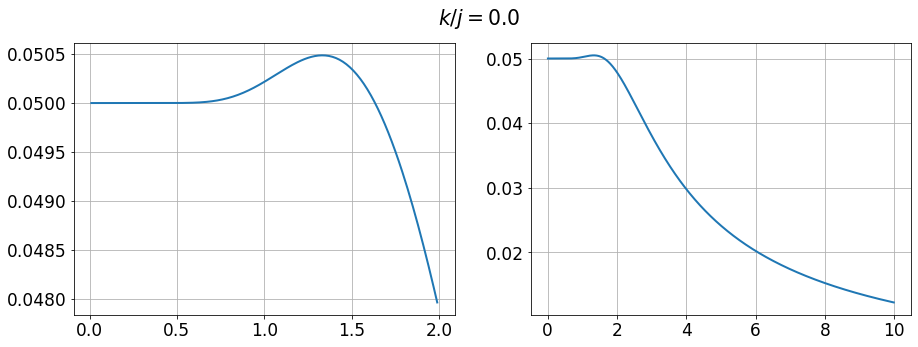

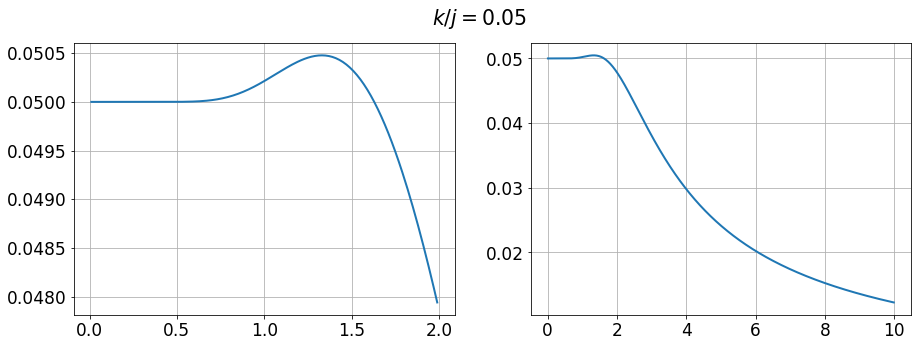

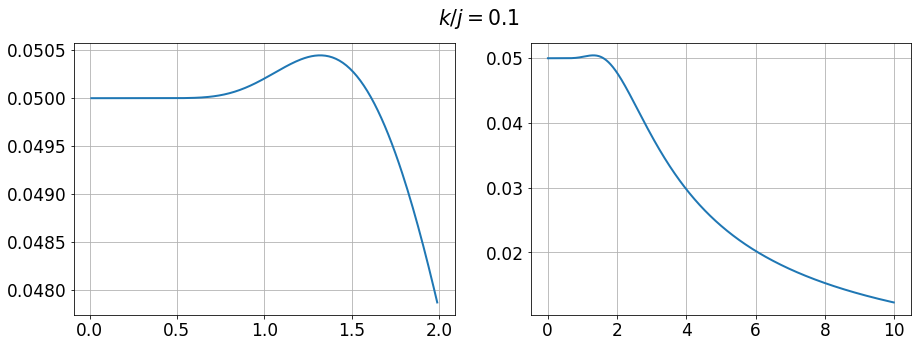

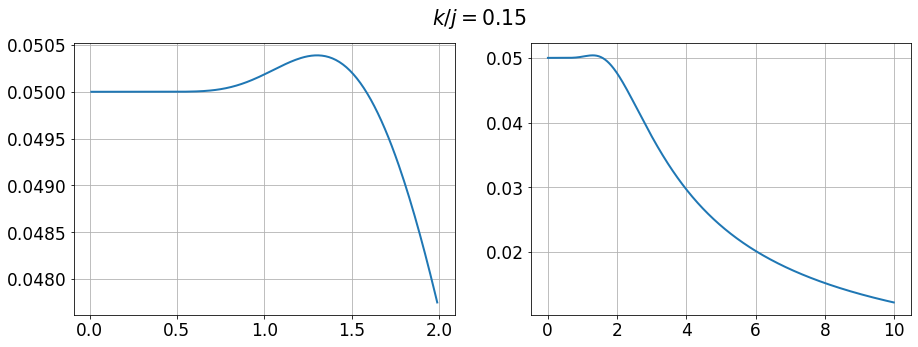

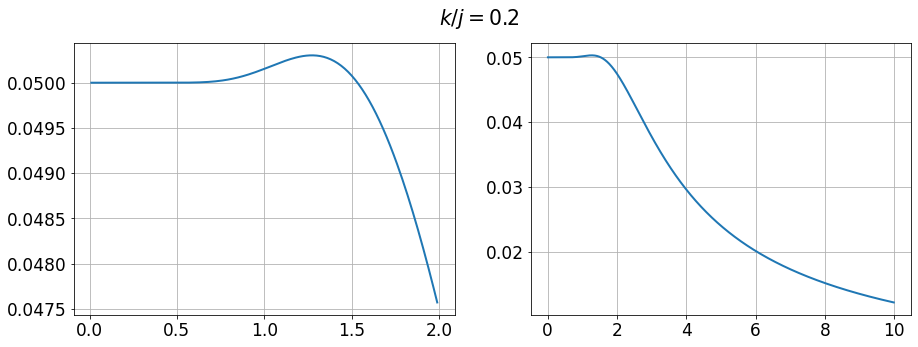

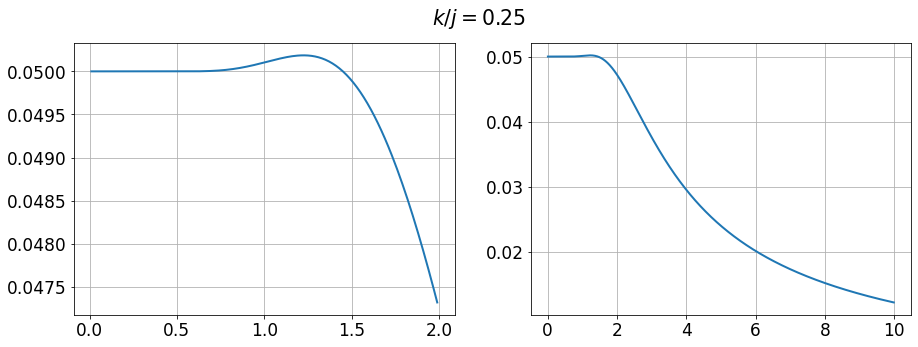

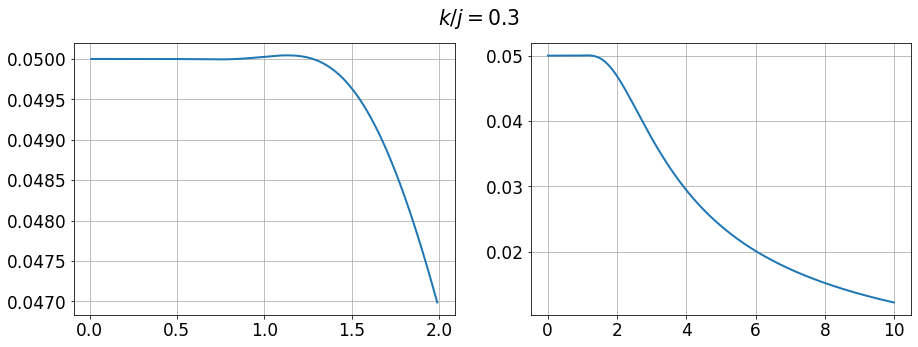

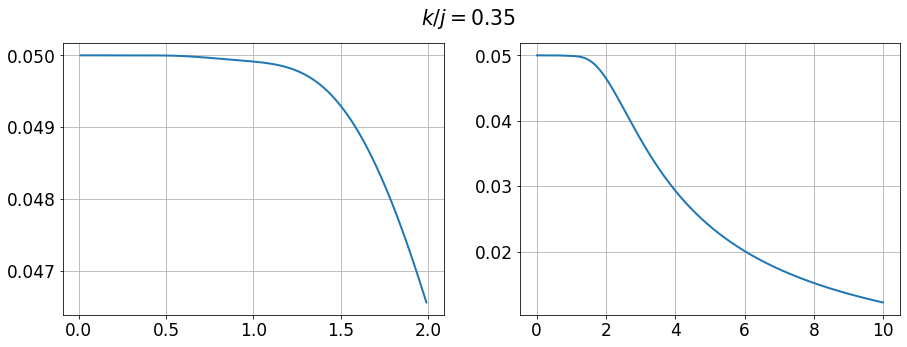

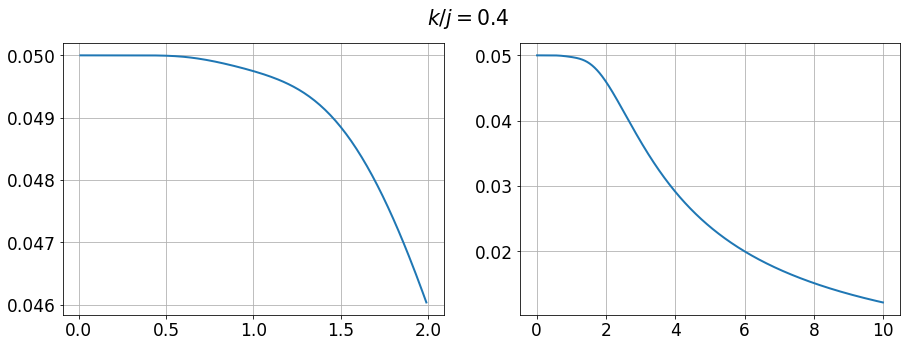

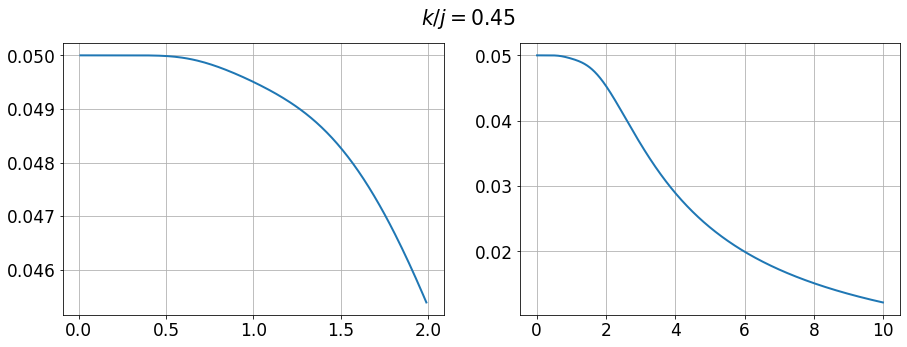

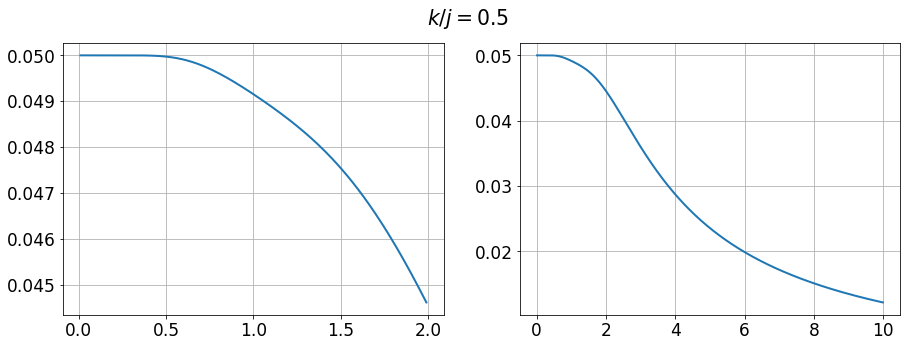

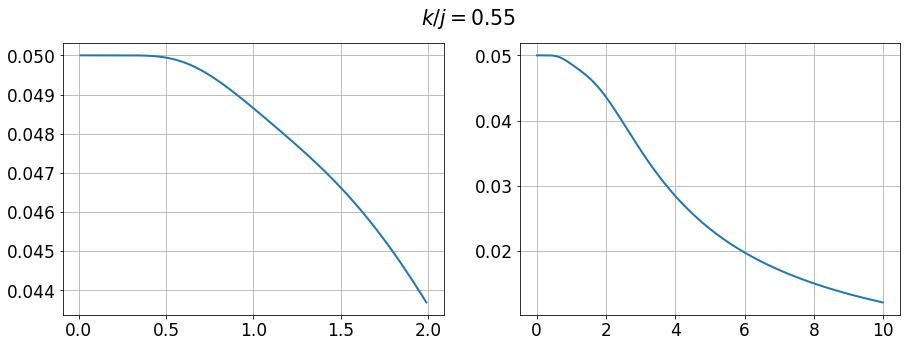

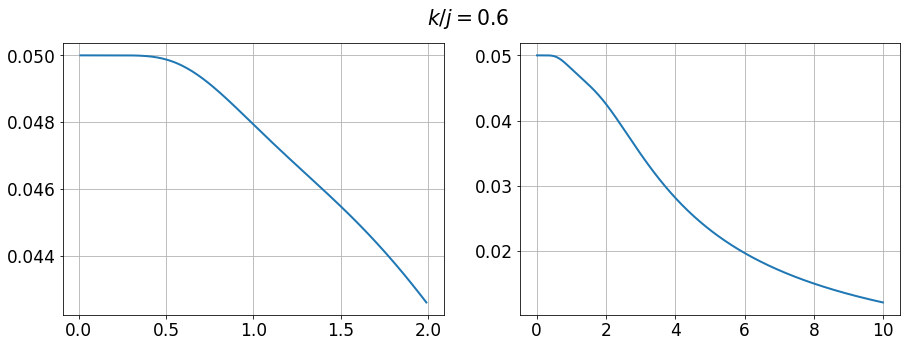

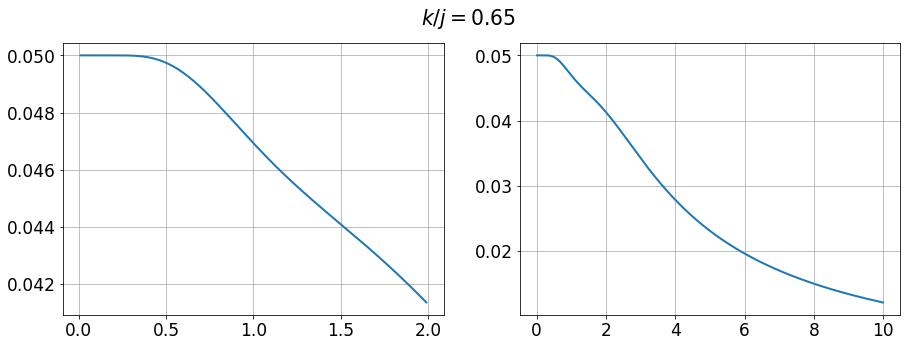

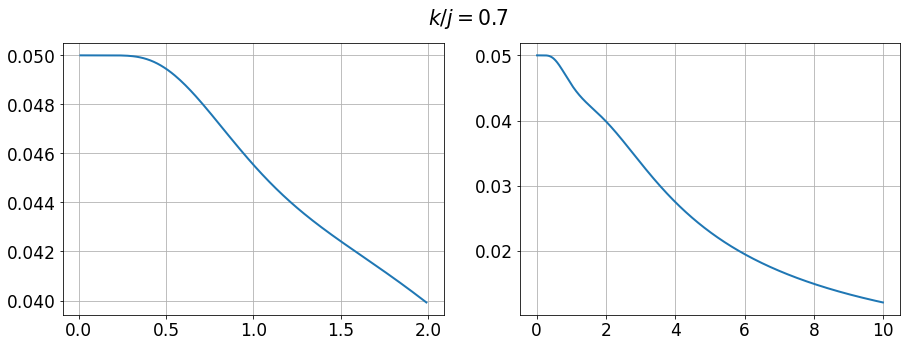

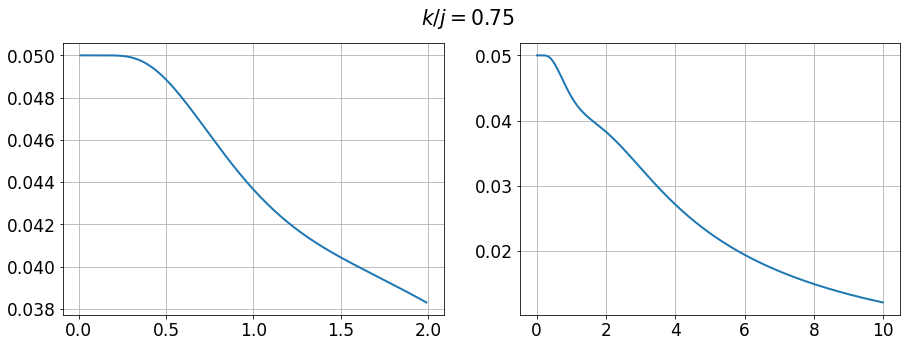

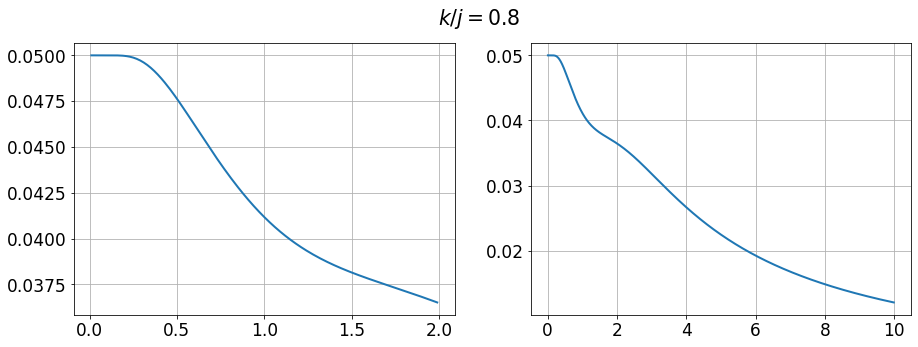

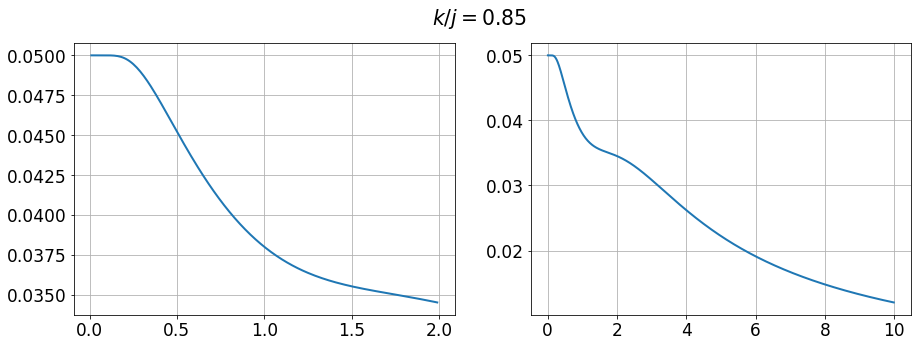

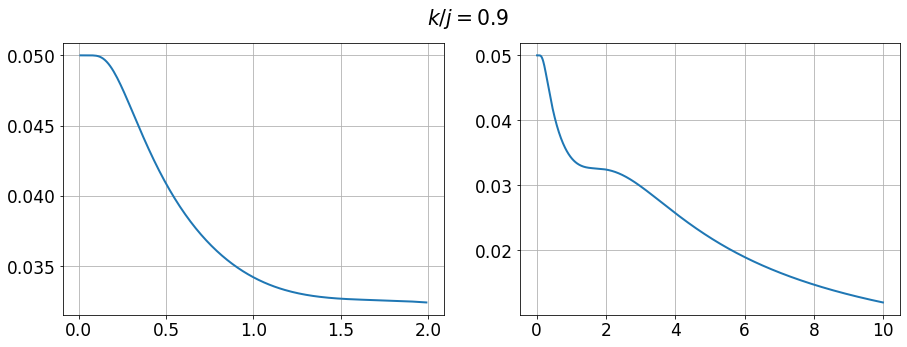

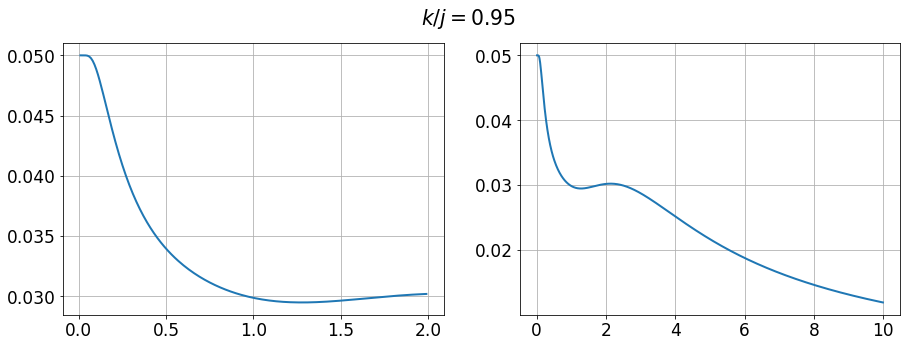

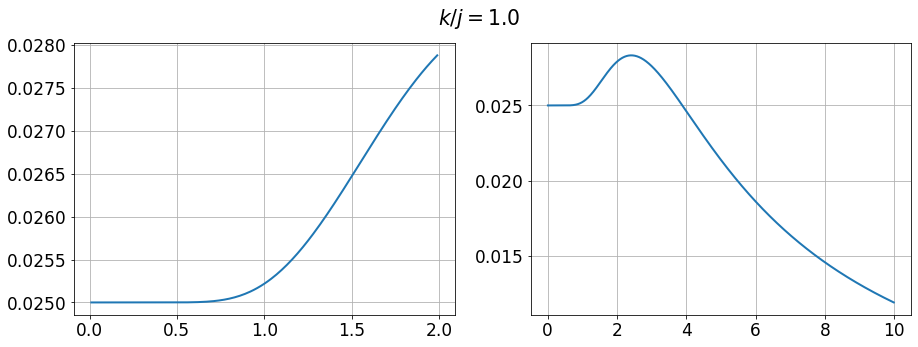

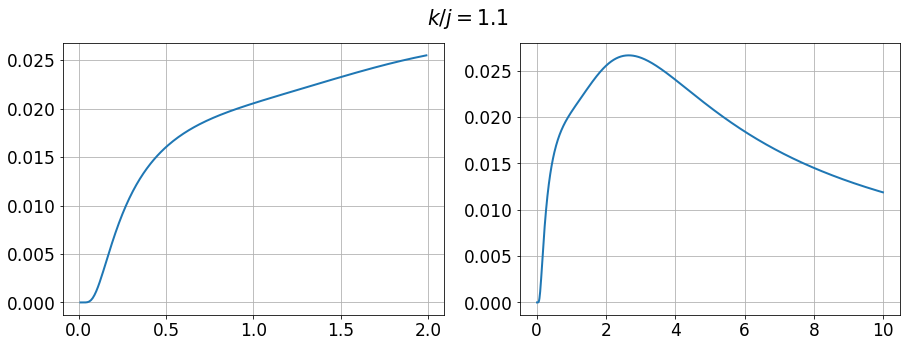

In [10]:
j = 10
T_range = np.arange(0.01, 10, 0.01)
ed = 0
for k in j*np.arange(0,1.1,0.05):
    data = itertools.product([ed],[j],[k], T_range)
    chi = np.array(Pool(processes=40).starmap(get_chi,data))
    small_r = np.where(T_range < 2)
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    ax[0].plot(T_range[small_r], chi[small_r])
    ax[1].plot(T_range, chi)
    plt.suptitle(r"$k/j={:.2}$".format(k/j))
    plt.show()

## Anirban da's Kondo

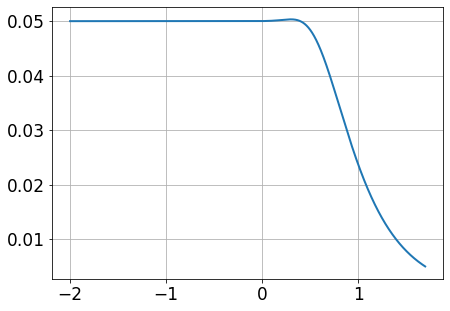

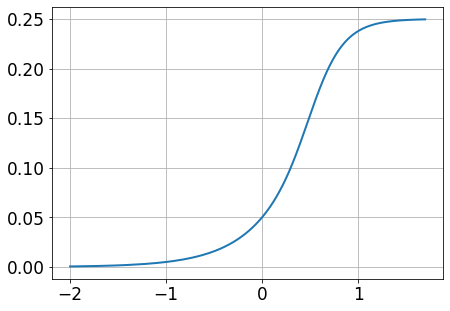

In [35]:
def get_chi_K(j, T):
    beta = 1/T
    x = beta * j/2
    return (beta/4) * (exp(-x) + sinh(x)/x)/(exp(-x) + cosh(x))

j = 10
T_range = np.arange(0.01,50,0.01)
data = itertools.product([j], T_range)
chi = np.array(Pool(processes=40).starmap(get_chi_K,data))
plt.plot(np.log10(T_range), chi)
plt.show()
plt.plot(np.log10(T_range), T_range*chi)
plt.show()